In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import set_config; set_config(display='diagram')


In [16]:
nRowsRead = None # specify 'None' if want to read whole file
df1 = pd.read_csv('/Users/bogumilo/Downloads/IT konsultant/Billigence/csvs/mac_ranking.csv', delimiter=';')
df1.dataframeName = 'mac_ranking.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 355 rows and 14 columns


In [21]:
nRowsRead = None # specify 'None' if want to read whole file
df2 = pd.read_csv('/Users/bogumilo/Downloads/IT konsultant/Billigence/csvs/The Guardian League Table Main Table 2013-2021.csv', delimiter=',')
df2.dataframeName = 'subjectareas.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')


There are 1077 rows and 14 columns


In [22]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ranking Year                  1077 non-null   int64  
 1   Ranking                       1077 non-null   int64  
 2   Ranking (Prev)                1069 non-null   float64
 3   Institution                   1077 non-null   object 
 4   Guardian score/100            1077 non-null   float64
 5   NSS Overall (%)               1072 non-null   float64
 6   NSS Teaching (%)              1072 non-null   float64
 7   NSS Feedback (%)              1072 non-null   float64
 8   Student:staff ratio           1077 non-null   float64
 9   Expenditure per student / 10  1071 non-null   float64
 10  Entry Tariff                  1076 non-null   float64
 11  Value added score/10          1076 non-null   float64
 12  Career prospects (%)          1077 non-null   float64
 13  Con

In [23]:
df2.columns


Index(['Ranking Year', 'Ranking', 'Ranking (Prev)', 'Institution',
       'Guardian score/100', 'NSS Overall (%)', 'NSS Teaching (%)',
       'NSS Feedback (%)', 'Student:staff ratio',
       'Expenditure per student / 10', 'Entry Tariff', 'Value added score/10',
       'Career prospects (%)', 'Continuation'],
      dtype='object')

## 1.1 Duplicates

In [24]:
df2.duplicated().sum()


0

## 1.2. Missing values

In [33]:
df2.isnull().sum().sort_values(ascending=False)/len(df2)


Ranking Year                    0.0
Ranking                         0.0
Institution                     0.0
Guardian score/100              0.0
NSS Overall (%)                 0.0
NSS Teaching (%)                0.0
NSS Feedback (%)                0.0
Student:staff ratio             0.0
Expenditure per student / 10    0.0
Entry Tariff                    0.0
Value added score/10            0.0
Career prospects (%)            0.0
dtype: float64

Median, mean, mode.
#central tendency features

In [26]:
df2 = df2.drop(columns=['Continuation', 'Ranking (Prev)'])


In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

imputer.fit(df2[['Value added score/10','Expenditure per student / 10','Student:staff ratio','Entry Tariff','NSS Overall (%)','NSS Teaching (%)','NSS Feedback (%)']])


SimpleImputer(strategy='median')

In [30]:
df2[['Value added score/10','Expenditure per student / 10','Student:staff ratio',
     'Entry Tariff','NSS Overall (%)','NSS Teaching (%)','NSS Feedback (%)']] = imputer.transform(df2[['Value added score/10','Expenditure per student / 10','Student:staff ratio',
                                                                                                       'Entry Tariff','NSS Overall (%)','NSS Teaching (%)','NSS Feedback (%)']])


## 1.3 Outliers

<AxesSubplot:>

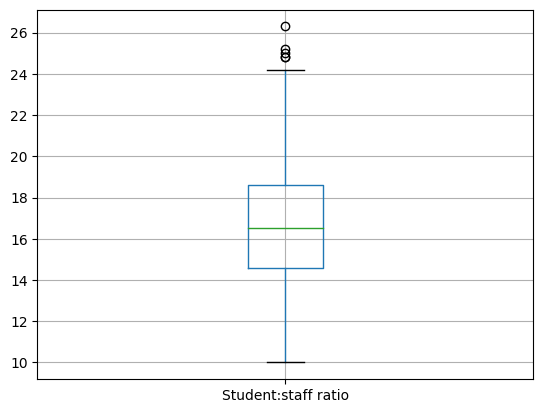

In [35]:
df2[['Student:staff ratio']].boxplot()


In [36]:
df2['Student:staff ratio'].sort_values()


944     10.0
1064    10.1
824     10.2
497     10.2
252     10.3
        ... 
871     24.8
1029    24.8
933     25.0
958     25.2
754     26.3
Name: Student:staff ratio, Length: 1077, dtype: float64

<AxesSubplot:>

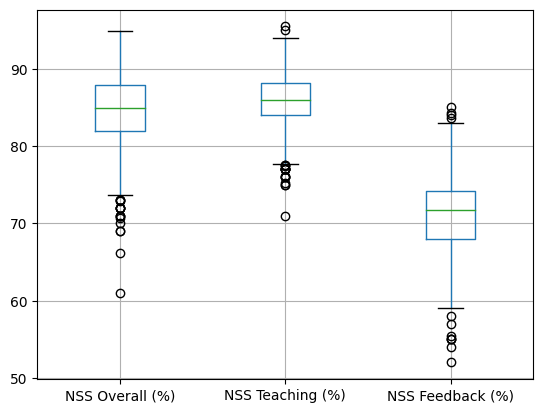

In [39]:
df2[['NSS Overall (%)','NSS Teaching (%)','NSS Feedback (%)']].boxplot()


In [40]:
df2[['NSS Overall (%)','NSS Teaching (%)','NSS Feedback (%)']].max()


NSS Overall (%)     94.9
NSS Teaching (%)    95.5
NSS Feedback (%)    85.1
dtype: float64

In [41]:
df2[['NSS Overall (%)','NSS Teaching (%)','NSS Feedback (%)']].min()


NSS Overall (%)     61.0
NSS Teaching (%)    71.0
NSS Feedback (%)    52.0
dtype: float64

In [42]:
df2.select_dtypes(exclude = 'object').columns.to_list


<bound method IndexOpsMixin.tolist of Index(['Ranking Year', 'Ranking', 'Guardian score/100', 'NSS Overall (%)',
       'NSS Teaching (%)', 'NSS Feedback (%)', 'Student:staff ratio',
       'Expenditure per student / 10', 'Entry Tariff', 'Value added score/10',
       'Career prospects (%)'],
      dtype='object')>

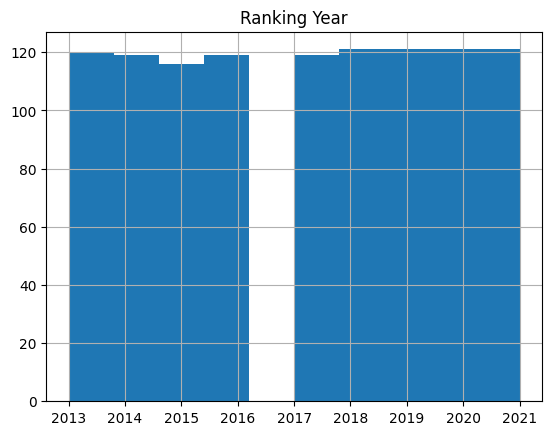

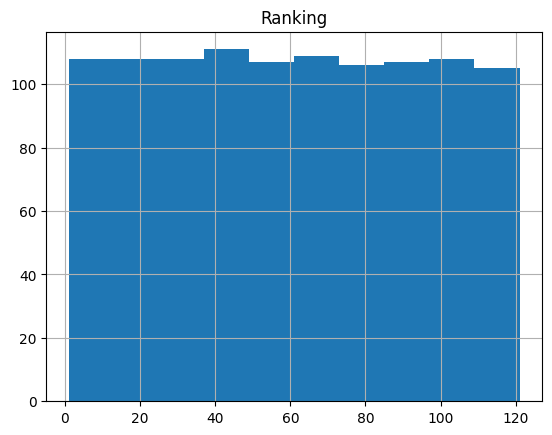

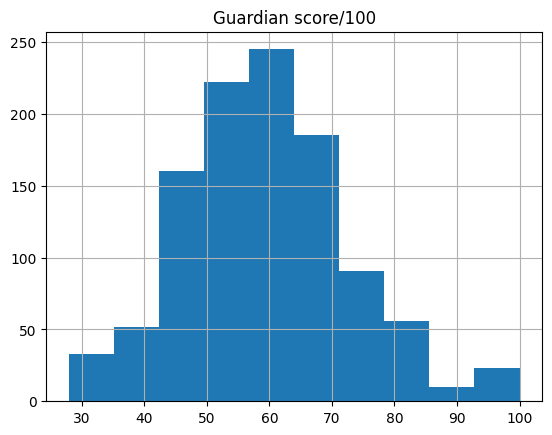

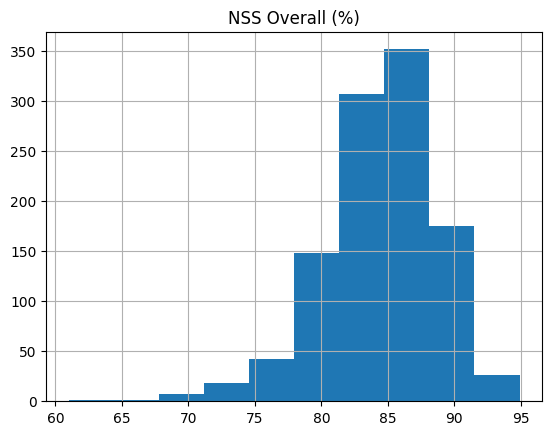

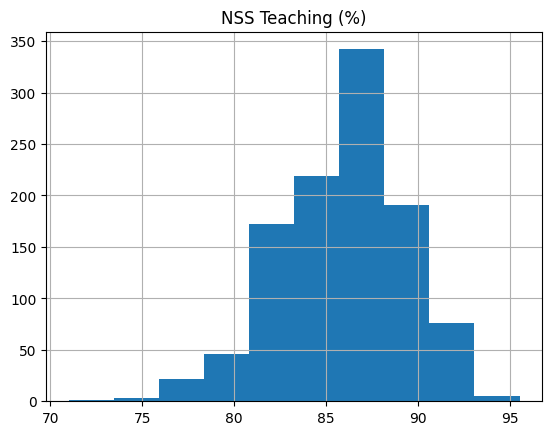

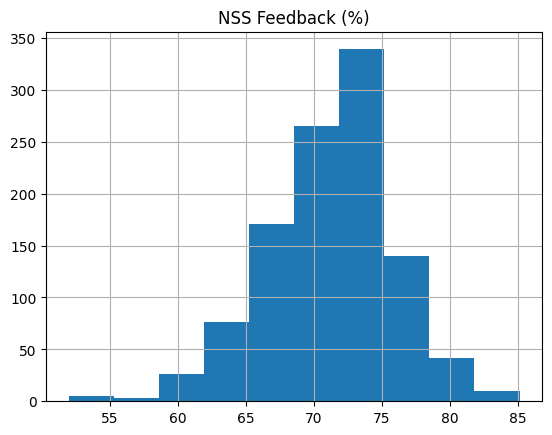

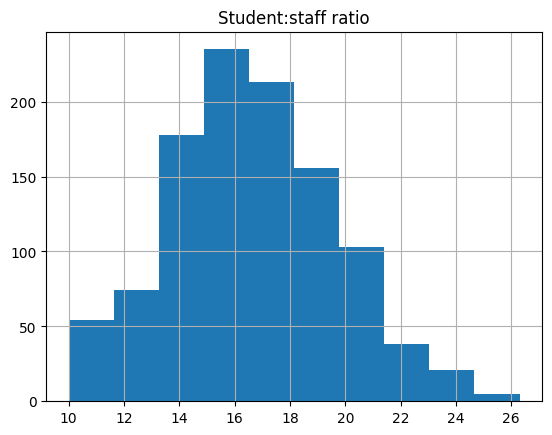

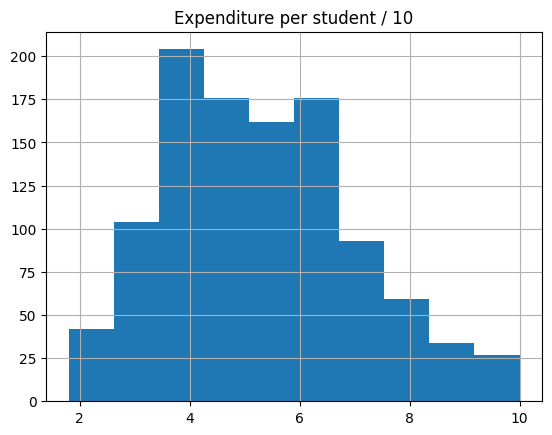

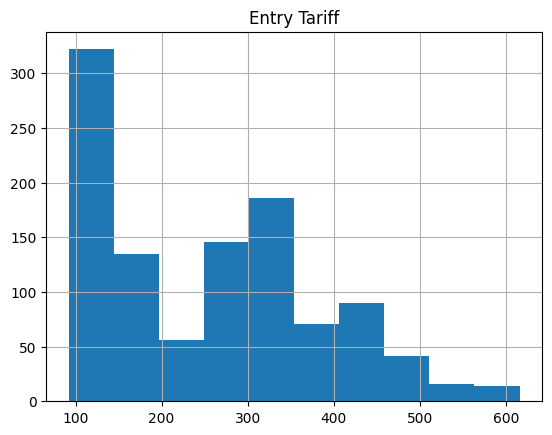

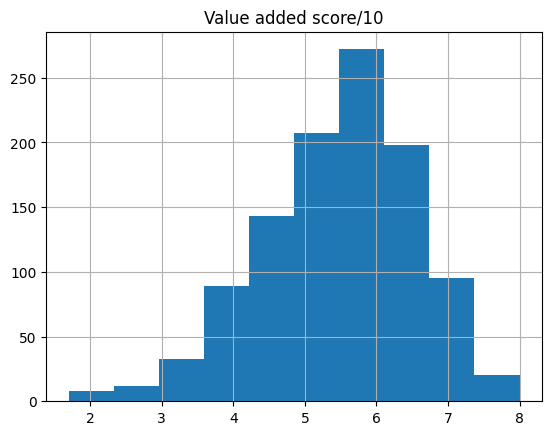

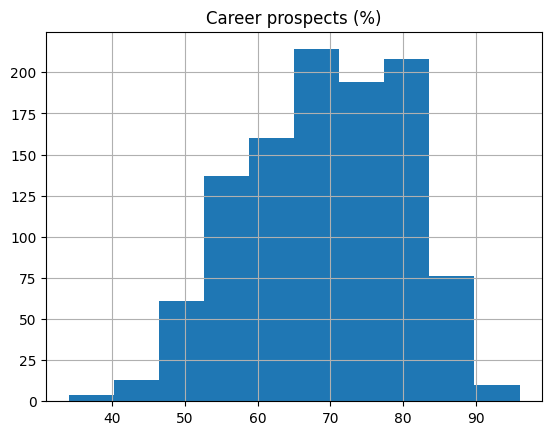

In [44]:
for each in df2.select_dtypes(exclude = 'object').columns:
    df2[[str(each)]].hist()


## 1.4 Feature scaling

In [48]:
df2.describe()


,Ranking Year,Ranking,Guardian score/100,NSS Overall (%),NSS Teaching (%),NSS Feedback (%),Student:staff ratio,Expenditure per student / 10,Entry Tariff,Value added score/10,Career prospects (%)
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,2017.020427,60.237697,59.479759,84.475395,85.908542,71.227669,16.654225,5.287558,257.031941,5.471216,69.168059
std,2.587421,34.572255,13.279918,4.324178,3.397099,4.673853,2.961879,1.728595,124.656288,1.072730,10.872636
min,2013.000000,1.000000,27.900000,61.000000,71.000000,52.000000,10.000000,1.800000,92.000000,1.700000,34.000000
25%,2015.000000,30.000000,50.600000,82.000000,84.000000,68.000000,14.600000,3.900000,133.000000,4.800000,61.000000
50%,2017.000000,60.000000,58.800000,85.000000,86.000000,71.800000,16.500000,5.100000,264.000000,5.600000,70.000000
75%,2019.000000,90.000000,67.400000,87.900000,88.200000,74.200000,18.600000,6.400000,338.000000,6.200000,78.000000
max,2021.000000,121.000000,100.000000,94.900000,95.500000,85.100000,26.300000,10.000000,616.000000,8.000000,96.000000


In [154]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [156]:
scaler = StandardScaler()

scaler.fit(df2[['Value added score/10']])


StandardScaler()

In [157]:
df2['Value added score/10'] = scaler.transform(df2[['Value added score/10']])


<AxesSubplot:>

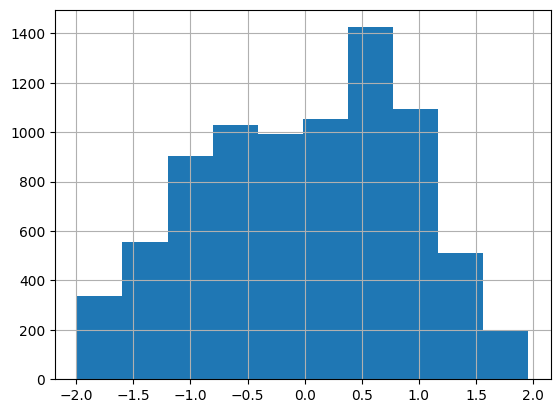

In [158]:
df2['Value added score/10'].hist()


In [45]:
from sklearn.preprocessing import RobustScaler


In [49]:
rs = RobustScaler()

rs.fit(df2[['Entry Tariff']])

df2[['Entry Tariff']] = rs.transform(df2[['Entry Tariff']])


<AxesSubplot:>

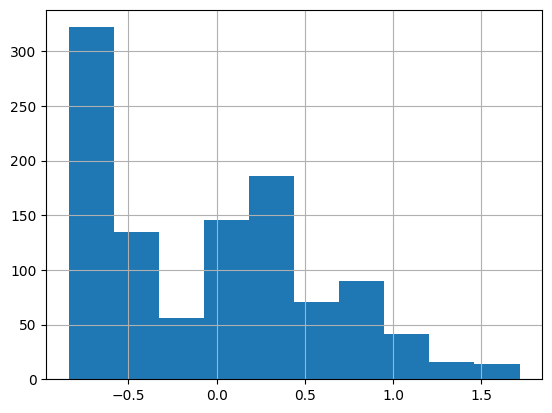

In [50]:
df2['Entry Tariff'].hist()


## 1.6 Encoding

In [163]:
df2['Institution'].unique()


array(['Aberdeen', 'Abertay Dundee', 'Aberystwyth', 'Anglia Ruskin',
       'Aston', 'Bangor', 'Bath', 'Bedfordshire', 'Birmingham',
       'Birmingham City', 'Bolton', 'Bournemouth', 'Bradford', 'Brighton',
       'Bristol', 'Brunel', 'Buckingham', 'Bucks New University',
       'Canterbury Christ Church', 'Cardiff', 'Cardiff Met',
       'Central Lancashire', 'Chester', 'Chichester', 'City', 'Coventry',
       'De Montfort', 'Derby', 'Dundee', 'Durham', 'East London',
       'Edge Hill', 'Edinburgh', 'Edinburgh Napier', 'Essex', 'Exeter',
       'Glasgow', 'Glasgow Caledonian', 'Gloucestershire', 'Greenwich',
       'Heriot-Watt', 'Hertfordshire', 'Huddersfield', 'Hull', 'Keele',
       'Kent', 'Kingston', 'Lancaster', 'Leeds', 'Leeds Met', 'Lincoln',
       'Liverpool', 'Liverpool John Moores', 'London Met',
       'London School of Economics', 'London South Bank', 'Loughborough',
       'Manchester', 'Manchester Met', 'Middlesex', 'Newcastle',
       'Northampton', 'Northumbria', '

In [52]:
df2['Institution'] = df2['Institution'].astype('category')
df2['Ranking Year'] = df2['Ranking Year'].astype('category')


In [167]:
df2['Subject Area'].unique()


['Accounting & Finance', 'Agriculture, Forestry & food', 'American studies', 'Anatomy & Physiology', 'Anthropology', ..., 'Social work', 'Sociology', 'Sports science', 'Tourism, transport and travel', 'Veterinary science']
Length: 62
Categories (62, object): ['Accounting & Finance', 'Agriculture, Forestry & food', 'American studies', 'Anatomy & Physiology', ..., 'Sociology', 'Sports science', 'Tourism, transport and travel', 'Veterinary science']

## 1.7 Discretizing

## 1.8 Feature selection

Remove features that driving noise.
- univariate


In [54]:
import seaborn as sns


<AxesSubplot:>

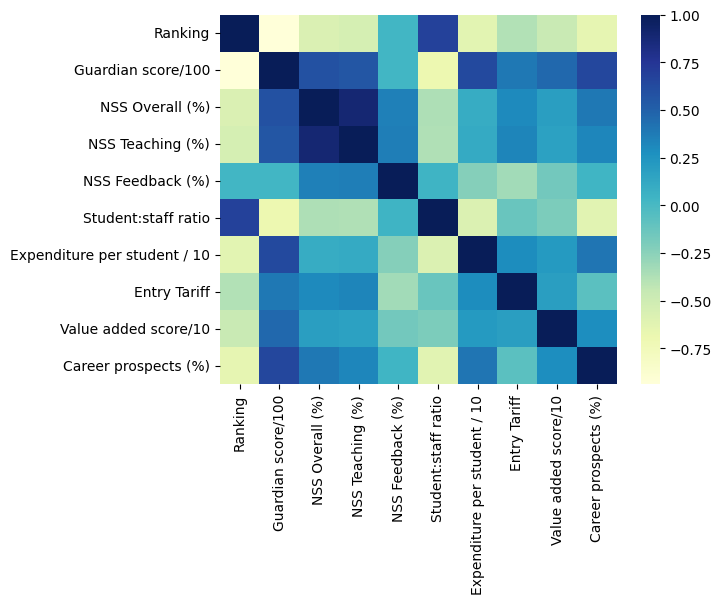

In [55]:
corr = df2. corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='YlGnBu')


In [56]:
corr_df2 = corr.unstack().reset_index()
corr_df2.columns = ['feature_1', 'feature_2', 'correlation']
corr_df2.sort_values(by='correlation', ascending=False, inplace=True)
corr_df2 = corr_df2[corr_df2['feature_1'] != corr_df2['feature_2']]
corr_df2.head(30)


,feature_1,feature_2,correlation
23,NSS Overall (%),NSS Teaching (%),0.891019
32,NSS Teaching (%),NSS Overall (%),0.891019
5,Ranking,Student:staff ratio,0.675096
50,Student:staff ratio,Ranking,0.675096
19,Guardian score/100,Career prospects (%),0.650739
91,Career prospects (%),Guardian score/100,0.650739
16,Guardian score/100,Expenditure per student / 10,0.634731
61,Expenditure per student / 10,Guardian score/100,0.634731
21,NSS Overall (%),Guardian score/100,0.585531
12,Guardian score/100,NSS Overall (%),0.585531


## 2. Modeling

In [66]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [58]:
target_encoder = LabelEncoder().fit(df2['Guardian score/100'])

y = target_encoder.transform(df2['Guardian score/100'])

y


array([455, 453, 446, ...,  75, 338,  75])

In [64]:
X = df2.drop(columns=['Guardian score/100','Institution'])


In [65]:
X_scaled = MinMaxScaler().fit_transform(X)


In [67]:
scores = cross_val_score(LinearRegression(), X_scaled, y, cv=10, error_score='raise')
scores.mean()


0.9086089323134072

### Feature permutation
Multivariate analysis of the features
Algorithm shuffles a feature within the test set records results for each. Then compare and have the answer which one is the most important

In [68]:
from sklearn.inspection import permutation_importance


In [69]:
model = LinearRegression().fit(X, y)

permutation_score = permutation_importance(model, X, y, n_repeats=10) # requires fitted model
permutation_score


{'importances_mean': array([2.94699301e-04, 1.14963869e+00, 6.78129207e-03, 7.22314077e-04,
        7.13253959e-03, 8.98634233e-03, 8.73176741e-03, 1.11636961e-02,
        5.71954767e-03, 1.01072510e-02]),
 'importances_std': array([0.00019414, 0.02621599, 0.0008338 , 0.00023442, 0.00087331,
        0.00134834, 0.00109697, 0.00110544, 0.00040872, 0.00136969]),
 'importances': array([[ 4.81559664e-04,  2.30697316e-04,  3.14182339e-04,
          1.96600809e-04,  4.29914458e-04,  5.32565397e-04,
          9.50194734e-05,  5.41057113e-04, -8.70015722e-05,
          2.12398010e-04],
        [ 1.20240865e+00,  1.16967018e+00,  1.12846255e+00,
          1.10485293e+00,  1.12746929e+00,  1.16428329e+00,
          1.16022290e+00,  1.16020176e+00,  1.13256067e+00,
          1.14625471e+00],
        [ 7.45817106e-03,  6.92691512e-03,  7.99742600e-03,
          6.08571867e-03,  5.42423344e-03,  8.18129889e-03,
          6.75493251e-03,  6.57516614e-03,  6.20591497e-03,
          6.20314391e-03],
 

In [72]:
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns = ['feature','score decrease']

importance_df.sort_values(by='score decrease', ascending=False)


,feature,score decrease
1,Ranking,1.149639
7,Entry Tariff,0.011164
9,Career prospects (%),0.010107
5,Student:staff ratio,0.008986
6,Expenditure per student / 10,0.008732
4,NSS Feedback (%),0.007133
2,NSS Overall (%),0.006781
8,Value added score/10,0.00572
3,NSS Teaching (%),0.000722
0,Ranking Year,0.000295


# 3. Predict

In [73]:
from sklearn.model_selection import train_test_split

y = df2['Guardian score/100']
X = df2.drop(columns=['Guardian score/100','Institution'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [74]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(753, 10) (324, 10)
(753,) (324,)


In [75]:
X_train


,Ranking Year,Ranking,NSS Overall (%),NSS Teaching (%),NSS Feedback (%),Student:staff ratio,Expenditure per student / 10,Entry Tariff,Value added score/10,Career prospects (%)
825,2015,14,91.0,92.0,70.0,13.0,7.3,0.814634,5.9,69.0
654,2016,52,88.4,86.4,71.5,15.3,4.8,0.303415,5.7,79.2
859,2014,29,87.0,89.0,67.0,14.2,6.7,0.824390,5.3,74.0
9,2021,10,86.9,85.0,70.1,12.5,8.1,-0.556098,5.2,84.0
444,2018,81,79.8,80.0,71.0,18.8,6.2,-0.710732,5.2,64.4
...,...,...,...,...,...,...,...,...,...,...
610,2016,8,87.2,88.4,66.9,11.3,7.8,1.484390,5.7,89.9
1045,2013,84,79.0,82.0,64.0,16.2,4.0,0.092683,4.7,53.0
924,2014,39,88.0,88.0,70.0,16.2,4.6,0.663415,5.7,64.0
534,2017,51,84.5,87.1,62.0,19.4,6.7,1.033659,4.8,72.2


In [76]:
y_train


825     76.1
654     61.7
859     68.7
9       73.1
444     53.8
        ... 
610     84.3
1045    48.5
924     65.5
534     61.5
44      61.9
Name: Guardian score/100, Length: 753, dtype: float64

In [77]:
mod = LinearRegression()
mod.fit(X_train, y_train)


LinearRegression()

In [79]:
predictions = mod.predict(X_test)


In [80]:
repr(mod.coef_)


'array([ 0.02633731, -0.24423105,  0.21970204, -0.04941019,  0.27985172,\n       -0.39149963,  0.96750303,  2.55469011,  1.15848575,  0.12276089])'

In [82]:
r2_score = mod.score(X_test, y_test)
r2_score


0.8960760771015917

## Importance selection

Feature: 0, Score: 0.02634
Feature: 1, Score: -0.24423
Feature: 2, Score: 0.21970
Feature: 3, Score: -0.04941
Feature: 4, Score: 0.27985
Feature: 5, Score: -0.39150
Feature: 6, Score: 0.96750
Feature: 7, Score: 2.55469
Feature: 8, Score: 1.15849
Feature: 9, Score: 0.12276


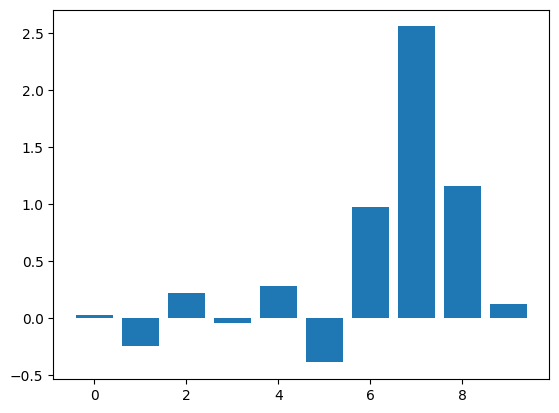

In [83]:
importance = mod.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()


In [84]:
importance


array([ 0.02633731, -0.24423105,  0.21970204, -0.04941019,  0.27985172,
       -0.39149963,  0.96750303,  2.55469011,  1.15848575,  0.12276089])